In [1]:
import numpy as np
import scipy as sci
from sympy import *
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def omega_SN(K,rho):
    factor1 = rho*rho - 1
    factor2 = rho*rho + 1
    under_root = K*factor1*(K*factor1*factor1-4)-4*factor2
    if(under_root<0):
        return -1
    numerator = pow(factor2,1.5)*np.sqrt(under_root)
    denominator = 2*factor1*factor1
    return numerator/denominator

In [3]:
def F_SN(K,rho):
    factor1 = (rho*rho-1)
    term1 = K*K*pow(factor1,3)
    term2 = 2*K*(pow(rho,4)-4*pow(rho,2)+3)
    under_root = term1+term2-8
    if(under_root<0):
        return -1
    numerator = np.sqrt(2)*rho*rho*np.sqrt(under_root)
    denominator = factor1*factor1
    return numerator/denominator

In [4]:
def F_hopf_general(K,omega):
    global F_TB
    factor1 = K-2
    factor2 = pow(K,4)-4*pow(K,3)+4*(pow(omega,2)+1)*K*K + 16*pow(omega,2)*K + 16*pow(omega,2)
    denominator = K+2
    under_root= factor1*factor2/denominator
    F_hopf_val=  1/(2*K)*np.sqrt(under_root)
    if(F_hopf_val>F_TB):
        return F_hopf_val
    else:
        return -1

In [5]:
def F_hopf(K,omega):
    global F_TB
    factor1 = 1/10
    factor2 = np.sqrt(3/7)
    factor3 = np.sqrt(225+196*omega*omega)
    F_hopf_val = (factor1*factor2*factor3)
    if(F_hopf_val>F_TB):
        return F_hopf_val
    else:
        return -1

In [6]:
K = 5
domain_rho = np.linspace(0,1,100)
omega_plot = []
F_plot = []
save_omega=0
save_F =0
for i in domain_rho:
    omega = omega_SN(K,i)
    F = F_SN(K,i)
    if(omega!=-1 and F!=-1):
        omega_plot.append(omega)
        F_plot.append(F)
        save_omega = omega
        save_F = F
        
F_hopf_plot=[]
omega_hopf =[]

omega_TB = (K-2)*K*K/(4*(K+2))
F_TB = (K-2)/4*np.sqrt((pow(K,3)-2*pow(K,2)+4*K-8)/(K+2))

domain_omega= np.linspace(0,4,100)
for i in domain_omega:
    if(i>omega_TB):
        F_hopf_plot.append(F_hopf(K,i))
        omega_hopf.append(i)

omega_domain = np.linspace(0,save_omega,100)
sniper = save_F/save_omega*omega_domain


    


Text(0.5, 1.0, 'Stability Diagram for Forced Kuramoto Model')

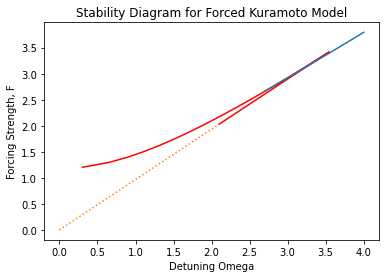

In [7]:
plt.plot(omega_plot,F_plot,'r')
plt.plot(omega_hopf,F_hopf_plot)
plt.plot(omega_domain,sniper,':')
plt.xlabel('Detuning Omega')
plt.ylabel('Forcing Strength, F')
plt.title('Stability Diagram for Forced Kuramoto Model')